# Inlcuding Header Files 

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import random
import matplotlib.pyplot as plt

# Process Data

In [19]:
%run process_data.ipynb import *

In [20]:
X_train , X_test , yTrain , yTest = process_data()

# K Nearest Neighbor model

now we are training K Nearest Neighbor with the training data

In [21]:
initial_n_neighbors_value = random.randint(1 , 30)
classifier = KNeighborsClassifier(n_neighbors = initial_n_neighbors_value, metric = 'minkowski', p = 2)

# Finding Optimal Hyperparameters

we now will try to find what is the best number of neighbor in KNN model

In [22]:
# define the parameter values that should be searched
# for python 2, k_range = range(1, 31)
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [23]:
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [24]:
# instantiate the grid
grid = GridSearchCV(classifier, param_grid, cv=10, scoring='accuracy')

In [25]:
# fit the grid with data
grid.fit(X_train, yTrain)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=30),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [26]:
# view the complete results (list of named tuples)
mean_test_scores = grid.cv_results_["mean_test_score"]
std_test_score = grid.cv_results_["std_test_score"]
params = grid.cv_results_["params"]
print("mean_test_scores\n" , mean_test_scores)
print("\nstd_test_score\n" , std_test_score)
print("\nparams\n" , params)

mean_test_scores
 [0.93170163 0.92272727 0.92262737 0.91240426 0.92136197 0.90337995
 0.90594406 0.90337995 0.90982351 0.90725941 0.91242091 0.9021312
 0.91243756 0.89955045 0.9033966  0.8982684  0.9033966  0.895671
 0.89955045 0.88791209 0.89180819 0.88791209 0.88921079 0.88663004
 0.88919414 0.88663004 0.88663004 0.88663004 0.88792874 0.88273393]

std_test_score
 [0.02952746 0.02214308 0.02243271 0.03076709 0.02732379 0.02506024
 0.02367834 0.01827229 0.02292221 0.0260465  0.0247341  0.01893141
 0.02263195 0.01671898 0.0152325  0.01633603 0.01820735 0.01930184
 0.01769906 0.01137058 0.01619488 0.01137058 0.01412373 0.01093906
 0.01164603 0.01093906 0.01093906 0.01093906 0.01262736 0.00689401]

params
 [{'n_neighbors': 1}, {'n_neighbors': 2}, {'n_neighbors': 3}, {'n_neighbors': 4}, {'n_neighbors': 5}, {'n_neighbors': 6}, {'n_neighbors': 7}, {'n_neighbors': 8}, {'n_neighbors': 9}, {'n_neighbors': 10}, {'n_neighbors': 11}, {'n_neighbors': 12}, {'n_neighbors': 13}, {'n_neighbors': 14}, {

Text(0, 0.5, 'Cross-Validated Accuracy')

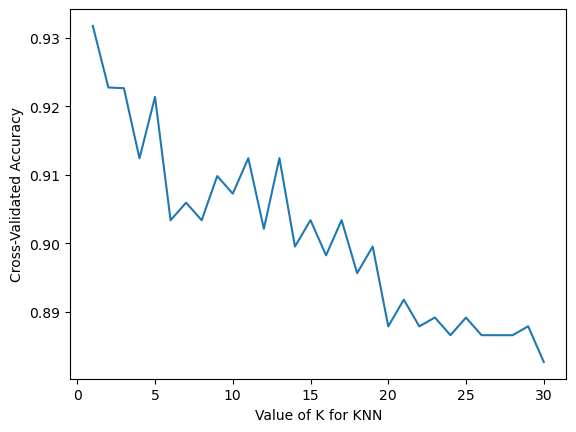

In [27]:
# plot the results
# this is identical to the one we generated above
plt.plot(k_range, mean_test_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [28]:
# examine the best model

# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.9317016317016318
{'n_neighbors': 1}
KNeighborsClassifier(n_neighbors=1)


## Due to when we choose K = 1 , it will be highly affected by noise , So we will choose second best choice at K = 7

# K Nearest Neighbor model with Optimal Hyperparameters

In [29]:
classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
classifier.fit(X_train , yTrain)

KNeighborsClassifier(n_neighbors=7)

we will predict the output for the test data

In [30]:
y_pred = classifier.predict(X_test)

# Evaluating the model

In [33]:
%run evaluation.ipynb import *

In [36]:
cm , cr = confusion_mat(yTest, y_pred)
print("Confusion matrix\n\n" ,cm , "\n")
print(cr)

Confusion matrix

 [[78  1]
 [ 3  5]] 

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        79
           1       0.83      0.62      0.71         8

    accuracy                           0.95        87
   macro avg       0.90      0.81      0.84        87
weighted avg       0.95      0.95      0.95        87



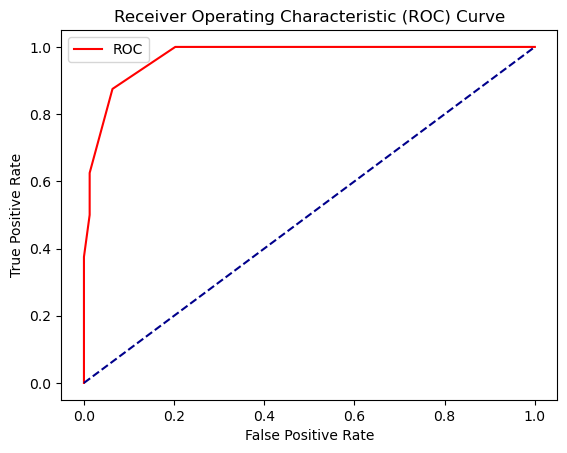

In [37]:
roc_plot(yTest, X_test)

In [38]:
score = roc_score(yTest, X_test)
print("ROC AUC Score: ", score)

ROC AUC Score:  0.9715189873417722
